# NiN Blocks

In [3]:
import torch
from torch import nn
from d2l import torch as d2l

<div>
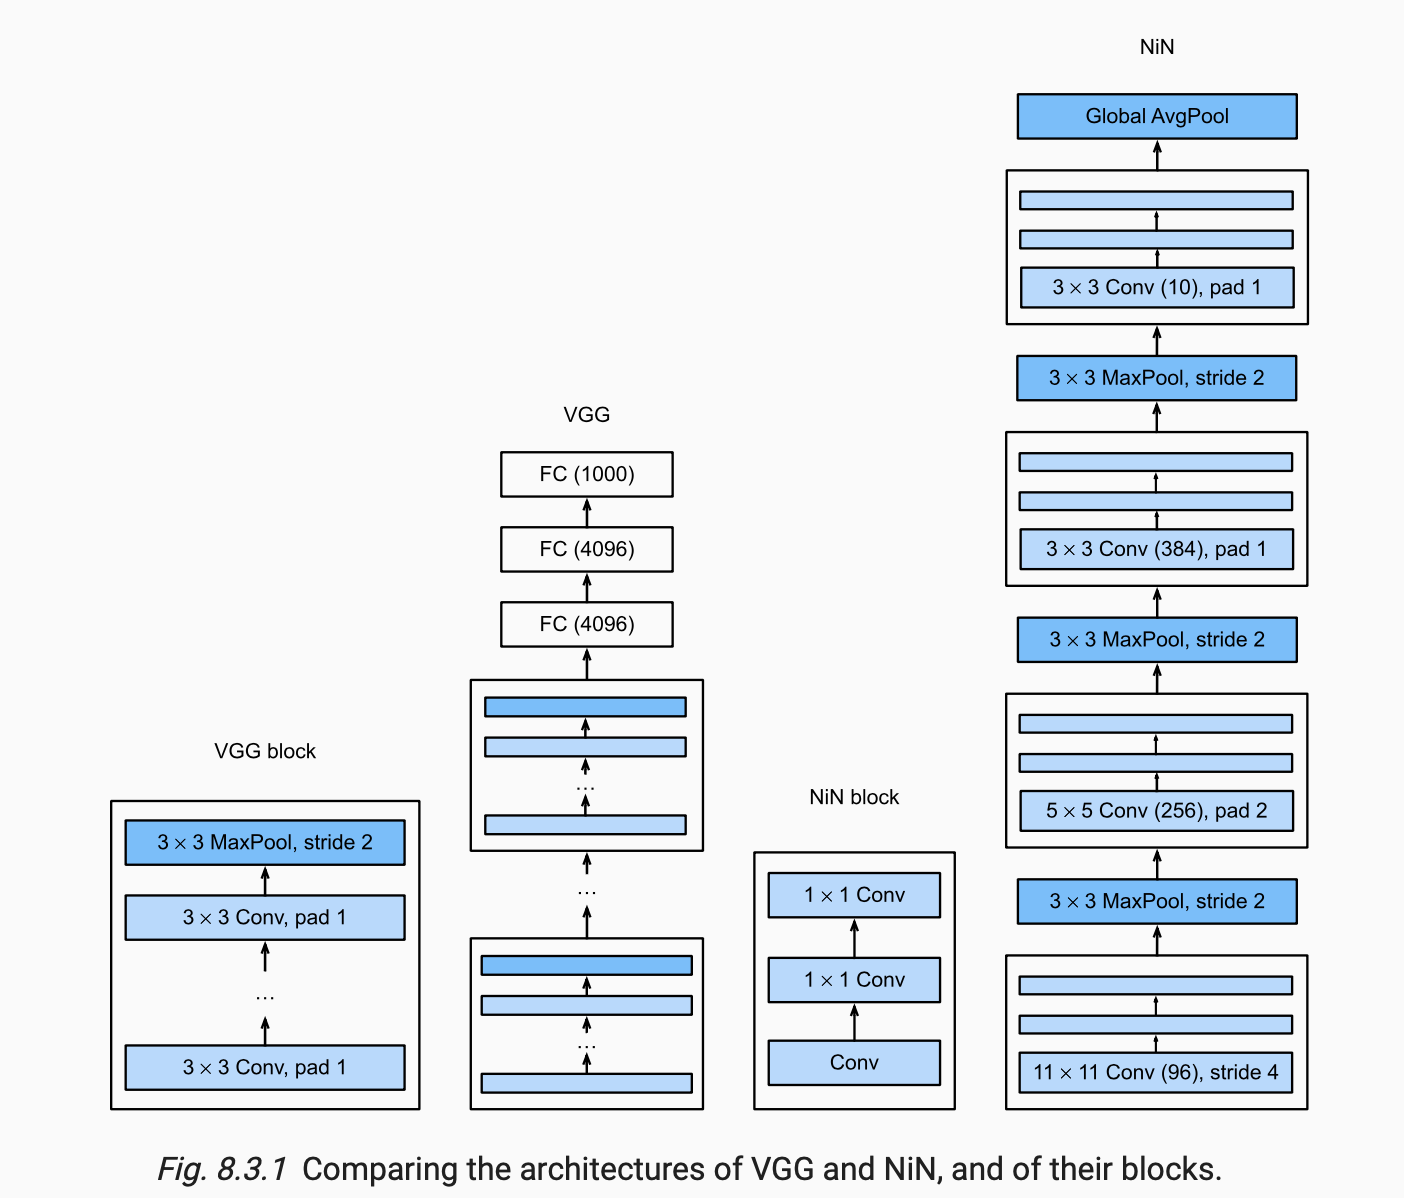
</div>

In [4]:
def nin_block(out_channels,kernel_size,strides,padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels,kernel_size,strides,padding),nn.ReLU(),
        nn.LazyConv2d(out_channels,kernel_size=(1,1)),nn.ReLU(),
        nn.LazyConv2d(out_channels,kernel_size=(1,1)),nn.ReLU()
    )

# NiN Model

The second significant difference between NiN and both AlexNet and VGG is that NiN avoids fully connected layers altogether. Instead, NiN uses a NiN block with a number of output channels equal to the number of label classes, followed by a global average pooling layer, yielding a vector of logits.

In [6]:
class NiN(d2l.Classifier):
    def __init__(self,lr=0.1,num_classses=10):
        super().__init__()
        self.save_hyperparameters()
        self.net=nn.Sequential(
            nin_block(96,kernel_size=11,strides=4,padding=0),
            nn.MaxPool2d(kernel_size=3,strides=2),
            nin_block(256,kernel_size=5,stride=1,padding=2),
            nn.MaxPool2d(kernel_size=3,stride=2),
            nin_block(384,kernel_size=3,stride=1,padding=1),
            nn.MaxPool2d(kernel_size=3,stride=2),
            nn.Dropout(0.5),
            nin_block(num_classses,kernel_size=3,stride=1,padding=1),
            nn.AdaptiveAvgPool2d((1,1)),
            nn.Flatten()
        )
        self.net.apply(d2l.init_cnn)

In [7]:
NiN().layer_summary((1, 1, 224, 224))

TypeError: nin_block() got an unexpected keyword argument 'stride'